<a href="https://colab.research.google.com/github/purpCactus/pythonia.init/blob/main/Session%206/Captcha.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## importing packages we need!

In [ ]:
import pandas as pd
import numpy as np
import cv2
import cv2 as cv
import matplotlib.pyplot as plt
from IPython.display import display
from PIL import Image
from google.colab import files

### This function removes the horizontal lines in pictures
with the help of opening followed by closing and circular kernels

In [ ]:
def remove_line(address):
    img = cv2.imread(address, cv2.IMREAD_GRAYSCALE)
    bw = cv.adaptiveThreshold(img, 255, cv.ADAPTIVE_THRESH_MEAN_C, cv.THRESH_BINARY_INV, 19, 7)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(5,3))
    closing = cv.morphologyEx(bw, cv.MORPH_CLOSE, kernel)
    kernel = cv.getStructuringElement(cv.MORPH_ELLIPSE,(7,10))
    opening = cv.morphologyEx(closing, cv.MORPH_OPEN, kernel)
    display(Image.fromarray(opening))
    return (opening)

### This function find the external contours and sorts the contours from left to right.

In [ ]:
def sort_contours(opening):
    contours, hierarchy = cv.findContours(opening, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
    boundingBoxes = [cv2.boundingRect(c) for c in contours]
    (contours, boundingBoxes) = zip(*sorted(zip(contours, boundingBoxes), key=lambda b:b[1][0]))
    return (contours)

### Here's where the magic happens.
at first we check the area of contours and ignore the useless ones.
then crop each contour (meaning each letter), and guess the letter off of the number of its childs... for example 'D' has one child... 'B' has two childs... and go on.
then for digits and the letter 'C' which doesn't have any chlid... we guess the letter from the number of its curves.

In [ ]:
def solve_captcha(contours):
    color = np.array(Image.open(address))
    img = cv.imread(address)
    answer = ''
    for i in range(len(contours)):
        cnt = contours[i]
        area = cv.contourArea(cnt)
        if area > 200:
            cv.drawContours(color, contours, i, (255, 0, 0), 4)
            x, y, w, h = cv.boundingRect(cnt)
            cv.rectangle(color, (x, y), (x+w, y+h), (0, 0, 255), 2)
            cropped = opening[y:y+h, x+5:x+w]
            contours_crp, hierarchy_crp = cv.findContours(cropped, cv.RETR_TREE, cv.CHAIN_APPROX_SIMPLE)
#             print(len(contours_crp),'!')
            if len(contours_crp) > 2:
                answer += 'B'
                continue
            elif len(contours_crp) == 2 :
                cnt_crp = contours_crp[1]
                area_child = cv.contourArea(cnt_crp)
                if area_child > 1500:
                    answer += 'D'
                    continue
                else:
                    answer += 'A'
                    continue
            peri = cv2.arcLength(cnt, True)
            approx = cv2.approxPolyDP(cnt, 0.0286 * peri, True)
            if len(approx) == 7:
                answer += '1'
            elif len(approx) == 8:
                answer += '2'
            elif len(approx) == 9:
                answer += 'C'
            elif len(approx) > 9:
                answer += '3'
            cv.drawContours(color, approx, -1, (0,255,0), 3)
    display(Image.fromarray(color))
    print(answer)

-




-

-

-

### Testing.
sample #1

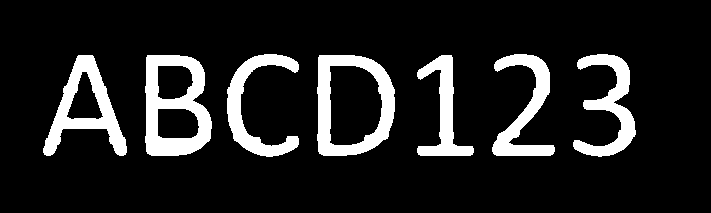

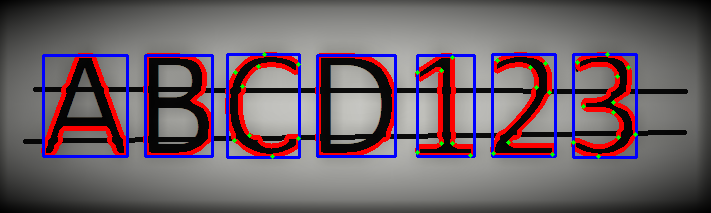

ABCD123


In [ ]:
address = './abcd123.png'
opening = remove_line(address)
sorted_contours = sort_contours(opening)
solve_captcha(sorted_contours)

-




-

-

-

-


sample #2


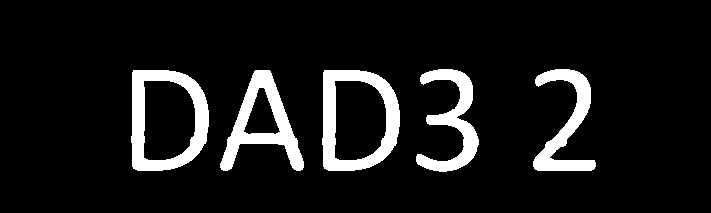

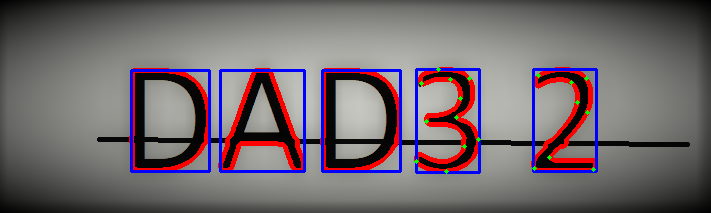

DAD32


In [ ]:
address = './dad32.png'
opening = remove_line(address)
sorted_contours = sort_contours(opening)
solve_captcha(sorted_contours)

-




-

-

-

-


-

-

sample #3

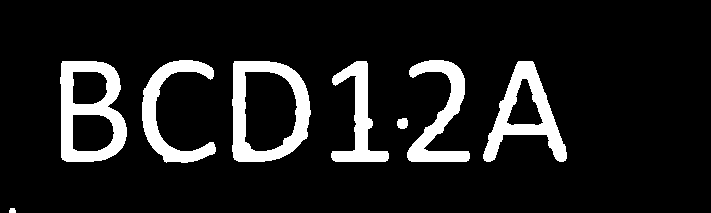

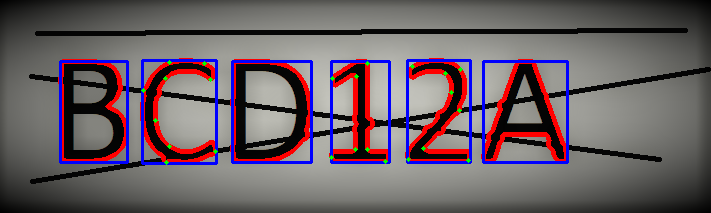

BCD12A


In [ ]:
address = './bcd12a.png'
opening = remove_line(address)
sorted_contours = sort_contours(opening)
solve_captcha(sorted_contours)